<a href="https://colab.research.google.com/github/Sayar1106/HotOrNotHotDog/blob/master/HotDogOrNot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Libraries

The reason for installing fastapi here is because the default installed version of fastai on Google Colab is deprecated.

In [1]:
 ! pip install -q kaggle
 !pip3 install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.3.1)


In [1]:
from google.colab import files
import re
from utils import is_hotdog
from fastai.vision.all import *
import numpy as np

Please ensure that you download your api key from your kaggle account and upload it to Colab.

In [2]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"sayar1106","key":"df930f3616507785dd6e0fea382936e5"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c hotdogornot

mkdir: cannot create directory ‘/root/.kaggle’: File exists
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
! unzip train.zip
! unzip test.zip

Archive:  train.zip
replace train_kaggle/pets_169.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  test.zip
replace test_kaggle/10000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Train Model

In [5]:
model = resnet34
WORK_DIR = os.getcwd()
IMAGE_DIR = Path('.')
image_size=299
batch_size=32

In [6]:
fnames = get_image_files(IMAGE_DIR /  'train_kaggle')
fnames[:5]

(#5) [Path('train_kaggle/frankfurter_6800.jpg'),Path('train_kaggle/pets_1036.jpg'),Path('train_kaggle/furniture_3247.jpg'),Path('train_kaggle/pets_588.jpg'),Path('train_kaggle/food_6136.jpg')]

In [8]:
# Dataloader for our learner
dls = ImageDataLoaders.from_name_func(IMAGE_DIR / 'train_kaggle', fnames, 
                                   valid_pct=0.2, seed=42, label_func=is_hotdog, 
                                   item_tfms=Resize(224), 
                                   batch_tfms=aug_transforms(mult=2))

In [9]:
# We just run the model for one epoch.
learn = cnn_learner(dls, model, metrics=accuracy)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.457774,0.159883,0.951087,00:43


epoch,train_loss,valid_loss,accuracy,time
0,0.284589,0.154956,0.951087,00:51


## Testing out our model

In [10]:
myimage = Image.open("/content/test_kaggle/10004.jpg")

In [11]:
fastimg = PILImage.create(np.array(myimage.convert('RGB')))

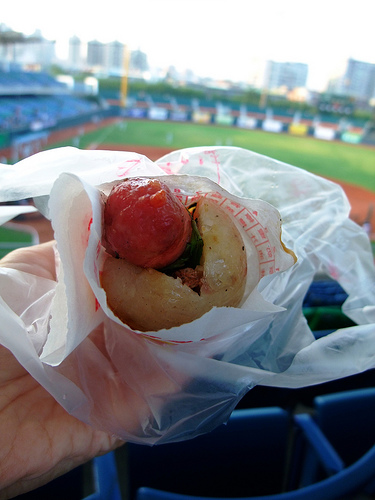

In [12]:
fastimg

In [13]:
is_hotdog,_,probs = learn.predict(fastimg)

In [36]:
print("Is this picture a hotdog?: ", is_hotdog)
print("With how much probability?: ", probs[1].item())

Is this picture a hotdog?:  True
With how much probability?:  1.0


## Saving the model

In [27]:
learn.export('model.pkl')